Ayoola Ogunbona <br>
Cody Padlo <br>
Soraya Karimi <br>

MSDS 422 <br>
Professor Anil Chaturvedi

# Module 5 Assignment 1: Titanic Machine Learning through Disaster

# Mount Google Drive

In [1]:
import google
from google.colab import drive

In [2]:
# note that the shared folder has to be added as a shortcut to "My Drive"
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 5: Titanic Machine Learning through Disaster/titanic/'

Mounted at /content/drive


# Import Libraries

In [3]:
import contextlib

In [4]:
import joblib

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import scipy
from scipy.stats import ks_2samp

In [9]:
import seaborn as sns

In [10]:
import sklearn

In [11]:
from sklearn.compose import ColumnTransformer

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
from sklearn.inspection import PartialDependenceDisplay

In [16]:
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import StandardScaler

In [22]:
import statsmodels

In [23]:
import statsmodels.api as sm

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
from tqdm.auto import tqdm

In [26]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# Display Adjustments

In [27]:
#%matplotlib inline

# Load Data

In [28]:
test_file_path = project_path + "test.csv"
test_df = pd.read_csv(test_file_path, sep=',')
print("Full test dataset shape is {}".format(test_df.shape))

Full test dataset shape is (418, 11)


In [29]:
train_file_path = project_path + "train.csv"
train_df = pd.read_csv(train_file_path, sep=',')
print("Full train dataset shape is {}".format(train_df.shape))

Full train dataset shape is (891, 12)


# Initial Review

## Test

In [30]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Train

In [33]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Creation

## Test

In [36]:
test_df['Actual_Name'] = np.where(test_df['Sex'] == 'male',
                                  test_df['Name'].str.extract(r'\(([^)]+)\)', expand=False).fillna(test_df['Name']),
                                  test_df['Name']
)

In [37]:
test_df['Sex'] = np.where(test_df['Sex'] == 'male', 0, 1)

In [38]:
test_df['Embarked'] = np.where(test_df['Embarked'] == 'S', 1,
                               np.where(test_df['Embarked'] == 'C', 2,
                                        np.where(test_df['Embarked'] == 'Q', 3, np.nan)))

In [39]:
test_df['Deck'] = test_df['Cabin'].str[0]

In [40]:
test_df['DeckLevel'] = test_df['Deck'].map({'A': 1,
                                            'B': 2,
                                            'C': 3,
                                            'D': 4,
                                            'E': 5,
                                            'F': 6,
                                            'G': 7,
                                            'T': 8}
                                          )

In [41]:
test_df['RoomNo'] = test_df['Cabin'].str[1:]

## Train

In [42]:
train_df['Actual_Name'] = np.where(train_df['Sex'] == 'male',
                                   train_df['Name'].str.extract(r'\(([^)]+)\)', expand=False).fillna(train_df['Name']),
                                   train_df['Name']
)

In [43]:
train_df['Sex'] = np.where(train_df['Sex'] == 'male', 0, 1)

In [44]:
train_df['Embarked'] = np.where(train_df['Embarked'] == 'S', 1,
                                np.where(train_df['Embarked'] == 'C', 2,
                                         np.where(train_df['Embarked'] == 'Q', 3, 0)))

In [45]:
train_df['Deck'] = train_df['Cabin'].str[0]

In [46]:
train_df['DeckLevel'] = train_df['Deck'].map({'A': 1,
                                              'B': 2,
                                              'C': 3,
                                              'D': 4,
                                              'E': 5,
                                              'F': 6,
                                              'G': 7,
                                              'T': 8}
                                            )

In [47]:
train_df['RoomNo'] = train_df['Cabin'].str[1:]

# Second Review

## Test

In [48]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Actual_Name', 'Deck',
       'DeckLevel', 'RoomNo'],
      dtype='object')

In [49]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Actual_Name,Deck,DeckLevel,RoomNo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3.0,"Kelly, Mr. James",NaN,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1.0,"Wilkes, Mrs. James (Ellen Needs)",NaN,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3.0,"Myles, Mr. Thomas Francis",NaN,NaN,NaN
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1.0,"Wirz, Mr. Albert",NaN,NaN,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,NaN,NaN


In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    float64
 11  Actual_Name  418 non-null    object 
 12  Deck         91 non-null     object 
 13  DeckLevel    91 non-null     float64
 14  RoomNo       91 non-null     object 
dtypes: float64(4), int64(5), object(6)
memory usage: 49.1+ KB


In [51]:
for column in test_df.columns:
  print(column)
  print(test_df[column].describe())

PassengerId
count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64
Pclass
count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Name
count                          418
unique                         418
top       Peter, Master. Michael J
freq                             1
Name: Name, dtype: object
Sex
count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64
Age
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
SibSp
count    418.000000
mean       0.

In [52]:
f_scores_list = []
p_values_list = []
valid_vars = []

X = train_df.drop(columns=['PassengerId', 'Survived'])
y = train_df['Survived']

for col in X.columns:
    X_col = X[[col]].dropna()
    y_col = y.loc[X_col.index]

    try:
        f_score, p_val = f_regression(X_col, y_col)
        f_scores_list.append(f_score[0])
        p_values_list.append(p_val[0])
        valid_vars.append(col)
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

eval_table = pd.DataFrame({
    "variable": valid_vars,
    "f_scores": f_scores_list,
    "p_values": p_values_list
}).sort_values(by="p_values", ascending=True)

display(eval_table)

Skipping Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Ticket due to error: could not convert string to float: 'A/5 21171'
Skipping Cabin due to error: could not convert string to float: 'C85'
Skipping Actual_Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Deck due to error: could not convert string to float: 'C'
Skipping RoomNo due to error: could not convert string to float: '23 C25 C27'


,variable,f_scores,p_values
1,Sex,372.405724,1.406066e-69
0,Pclass,115.031272,2.537047e-25
5,Fare,63.030764,6.120189e-15
6,Embarked,9.318420,2.336110e-03
4,Parch,5.963464,1.479925e-02
2,Age,4.271195,3.912465e-02
3,SibSp,1.110572,2.922439e-01
7,DeckLevel,0.071612,7.892768e-01


## Train

In [53]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Actual_Name', 'Deck',
       'DeckLevel', 'RoomNo'],
      dtype='object')

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Actual_Name,Deck,DeckLevel,RoomNo
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,"Braund, Mr. Owen Harris",NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,3.0,85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"Heikkinen, Miss. Laina",NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C,3.0,123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,"Allen, Mr. William Henry",NaN,NaN,NaN


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Actual_Name  891 non-null    object 
 13  Deck         204 non-null    object 
 14  DeckLevel    204 non-null    float64
 15  RoomNo       204 non-null    object 
dtypes: float64(3), int64(7), object(6)
memory usage: 111.5+ KB


In [56]:
for column in train_df.columns:
  print(column)
  print(train_df[column].describe())

PassengerId
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
Survived
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
Pclass
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Name
count                     891
unique                    891
top       Dooley, Mr. Patrick
freq                        1
Name: Name, dtype: object
Sex
count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64
Age
count    714.000000
mean      29.699118
std       14.

In [57]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Actual_Name,Deck,DeckLevel,RoomNo
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,"Braund, Mr. Owen Harris",NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,3.0,85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"Heikkinen, Miss. Laina",NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C,3.0,123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,"Allen, Mr. William Henry",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1,"Montvila, Rev. Juozas",NaN,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1,"Graham, Miss. Margaret Edith",B,2.0,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2,"Behr, Mr. Karl Howell",C,3.0,148


In [58]:
train_corr = train_df.drop(columns=['PassengerId']).select_dtypes(include=['number']).corr()

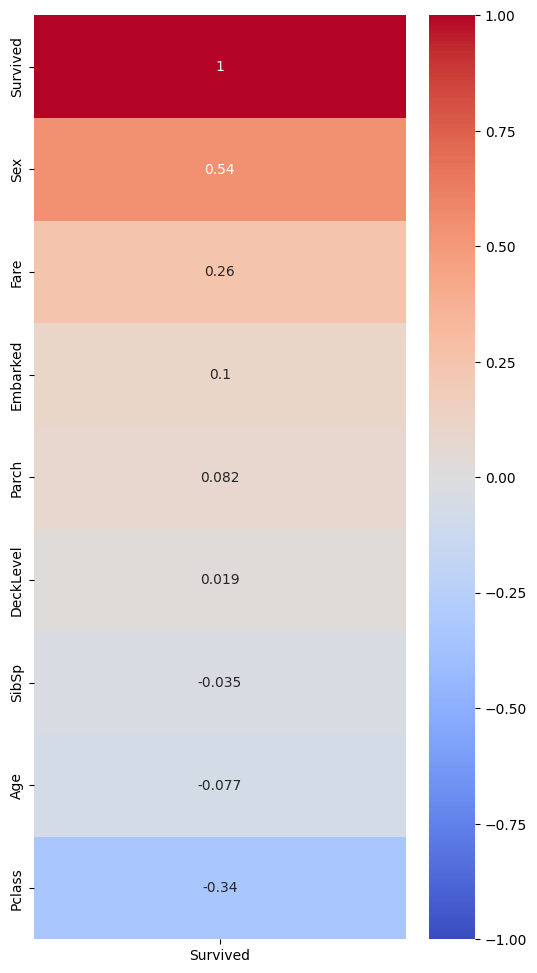

In [59]:
plt.figure(figsize=(6, 12))
sns.heatmap(train_corr[['Survived']].sort_values(
                                              by='Survived',
                                              ascending=False
                                             ),
            cmap="coolwarm",
            annot=True,
            vmin=-1,
            vmax=1
           )
plt.show()

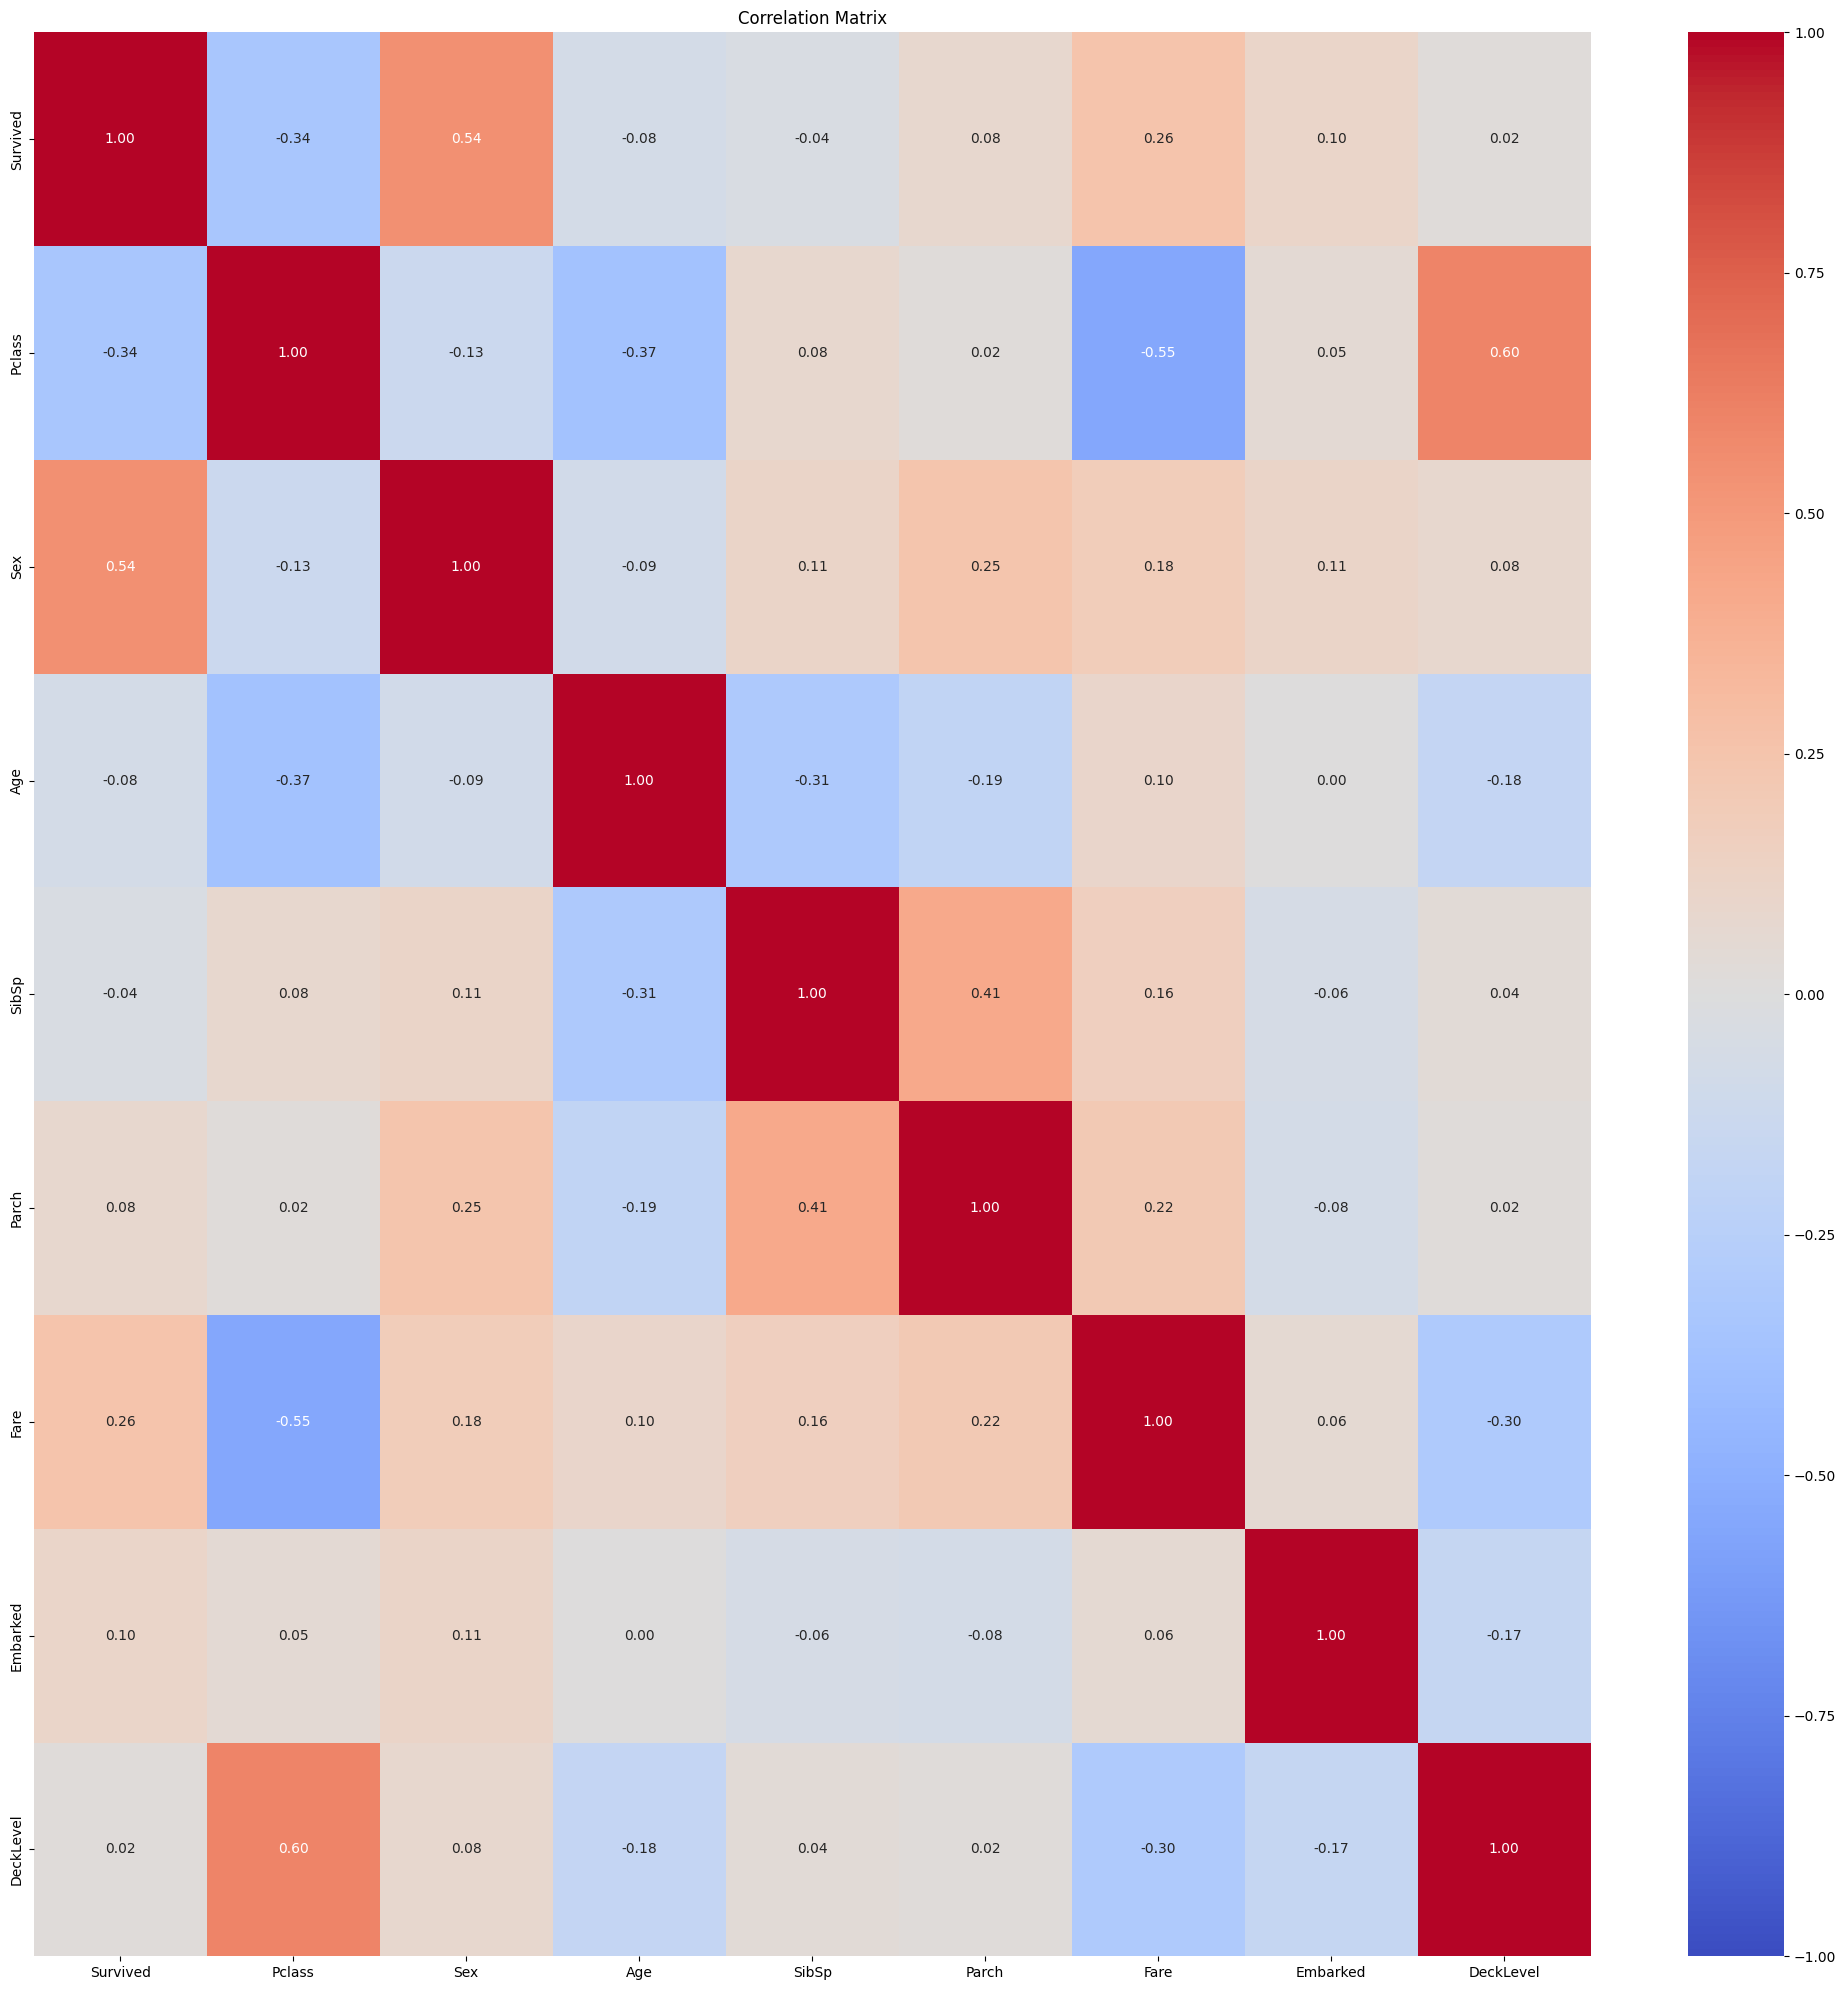

In [60]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_corr,
            annot=True,
            vmin=-1,
            vmax=1 ,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [61]:
f_scores_list = []
p_values_list = []
valid_vars = []

X = train_df.drop(columns=['PassengerId', 'Survived'])
y = train_df['Survived']

for col in X.columns:
    X_col = X[[col]].dropna()
    y_col = y.loc[X_col.index]

    try:
        f_score, p_val = f_regression(X_col, y_col)
        f_scores_list.append(f_score[0])
        p_values_list.append(p_val[0])
        valid_vars.append(col)
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

eval_table = pd.DataFrame({
    "variable": valid_vars,
    "f_scores": f_scores_list,
    "p_values": p_values_list
}).sort_values(by="p_values", ascending=True, ignore_index=True)

display(eval_table)

Skipping Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Ticket due to error: could not convert string to float: 'A/5 21171'
Skipping Cabin due to error: could not convert string to float: 'C85'
Skipping Actual_Name due to error: could not convert string to float: 'Braund, Mr. Owen Harris'
Skipping Deck due to error: could not convert string to float: 'C'
Skipping RoomNo due to error: could not convert string to float: '23 C25 C27'


,variable,f_scores,p_values
0,Sex,372.405724,1.406066e-69
1,Pclass,115.031272,2.537047e-25
2,Fare,63.030764,6.120189e-15
3,Embarked,9.318420,2.336110e-03
4,Parch,5.963464,1.479925e-02
5,Age,4.271195,3.912465e-02
6,SibSp,1.110572,2.922439e-01
7,DeckLevel,0.071612,7.892768e-01


Comparing the train and test datasets, the only difference, column-wise, is the inclusion of the **Survived** column in the train dataset. <br>
Despite the different number of rows in each dataset, only **Fare** (test_df), **Age**, **Cabin**, and **Embarked** (train_df) had nulls. <br>
Statistics for min/max and quartiles are rather similiar across the dataset. <br>
**Cabin** may benefit from being split into deck and room number.

# Model Generation

## Model 1: Random Forest

In [62]:
rf_train_df = train_df.copy()
rf_train_df = rf_train_df.drop(columns=["PassengerId", "Name", "Actual_Name", "Ticket", "Cabin", "Deck", "DeckLevel", "RoomNo"])

In [63]:
# Define feature matrix X and target y
rf_X = rf_train_df.drop("Survived", axis=1)
rf_y = rf_train_df["Survived"]

In [64]:
# Define hyperparameter grid
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 6, 8, None],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [65]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

In [66]:
# Perform grid search with 12-fold cross-validation
rf_cv = 12
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       cv=rf_cv,
                       scoring='accuracy',
                       n_jobs=-1)

In [67]:
@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_callback
        tqdm_object.close()


In [68]:
rf_total_fits = rf_cv * len(rf_params['n_estimators']) * len(rf_params['max_features']) * len(rf_params['max_depth']) * len(rf_params['criterion'])
print(f"{rf_total_fits} fits to be tested")

576 fits to be tested


In [69]:
# with tqdm_joblib(tqdm(desc="Fitting Random Forest GridSearch", total=rf_total_fits)) as progress_bar:
#     grid_rf.fit(rf_X, rf_y)
grid_rf.fit(rf_X, rf_y)

GridSearchCV(cv=12, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400]},
             scoring='accuracy')

In [70]:
# Best model
best_rf = grid_rf.best_estimator_
print("Best parameters:", grid_rf.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}


/tmp/ipython-input-1029767038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


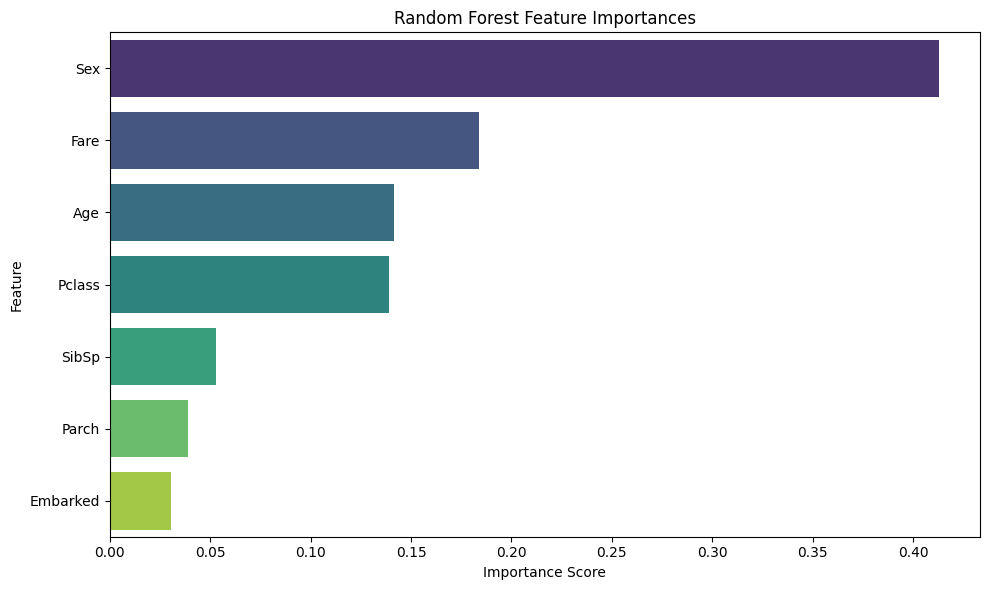

In [71]:
importances = best_rf.feature_importances_
features = rf_X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Evaluate against known Survivors

In [72]:
# Predict on training data to compare performance
rf_y_pred = best_rf.predict(rf_X)

In [73]:
# Evaluate performance
print("Training Accuracy:", accuracy_score(rf_y, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(rf_y, rf_y_pred))
print("\nClassification Report:")
print(classification_report(rf_y, rf_y_pred))

Training Accuracy: 0.8664421997755332
Confusion Matrix:
[[523  26]
 [ 93 249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       549
           1       0.91      0.73      0.81       342

    accuracy                           0.87       891
   macro avg       0.88      0.84      0.85       891
weighted avg       0.87      0.87      0.86       891



In [74]:
cv_scores = cross_val_score(best_rf, rf_X, rf_y, cv=12)
print("5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))

5-Fold CV Accuracy Scores: [0.8        0.76       0.78666667 0.82432432 0.90540541 0.91891892
 0.78378378 0.85135135 0.7972973  0.7972973  0.87837838 0.86486486]
Mean CV Accuracy: 0.8307


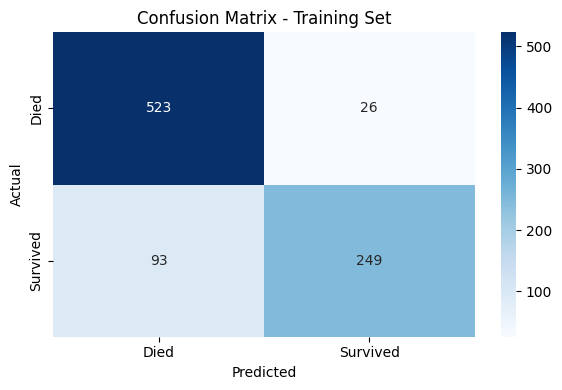

In [75]:
# Predict on training data
rf_y_pred = best_rf.predict(rf_X)

# Confusion matrix Heatmap
cm = confusion_matrix(rf_y, rf_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


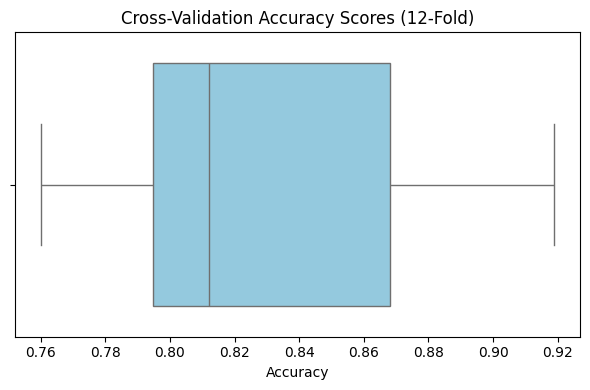

Mean CV Accuracy: 0.8307


In [76]:
# Cross-Validation Accuracy Boxplot
cv_scores = cross_val_score(best_rf, rf_X, rf_y, cv=12)

plt.figure(figsize=(6, 4))
sns.boxplot(data=cv_scores, orient='h', color='skyblue')
plt.title('Cross-Validation Accuracy Scores (12-Fold)')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.show()

# mean accuracy
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))


### Generate Predictions

In [77]:
rf_test_df = test_df.copy()
rf_test_df = rf_test_df.drop(columns=["PassengerId", "Name", "Actual_Name", "Ticket", "Cabin", "Deck", "DeckLevel", "RoomNo"])

In [78]:
# Predict on the test dataset
rf_predictions = best_rf.predict(rf_test_df)

In [79]:
# Prepare submission file
submission_rf = pd.DataFrame({
    'PassengerId': test_df["PassengerId"],
    'Survived': rf_predictions
})

In [80]:
# Export test predictions to CSV
submission_rf.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 5: Titanic Machine Learning through Disaster/predictions_randomforest.csv", index=False)

## Model 2: Gradient Boosted Trees

In [81]:
gb_train_df = train_df.copy()
gb_train_df = gb_train_df.drop(columns=["PassengerId", "Name", "Actual_Name", "Ticket", "Cabin", "Deck", "DeckLevel", "RoomNo"])
gb_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,NaN,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


In [82]:
gb_X = gb_train_df.drop("Survived", axis=1)
gb_y = gb_train_df["Survived"]

<Axes: >

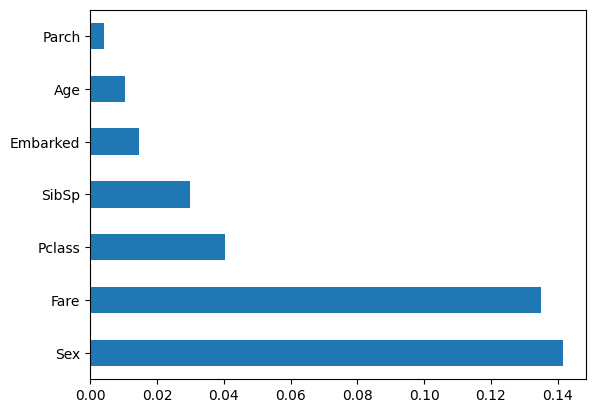

In [83]:
# evaluation for data leakage is OK, < 0.3 indicates no variables were created after the outcome or is a proxy for the outcome
mi = mutual_info_classif(gb_X.fillna(gb_X.median(numeric_only=True)),  gb_y)
pd.Series(mi, index=gb_X.columns).sort_values(ascending=False).plot.barh()

In [84]:
# preparing our variables
features = gb_X.columns

In [85]:
#  Preprocessing pipelines
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, features)
])

In [86]:
# Define full pipeline with XGBClassifier

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_jobs=-1,
        random_state=42
    ))
])


In [87]:
# set up for cross validation of hyperparameters
param_distributions = {
    "classifier__n_estimators": [100, 125, 150, 200] , # Number of boosting rounds
    "classifier__max_depth": [2, 3, 5, 7], # Tree depth
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.3], # Step size shrinkage
}

In [88]:
gb_cv = 12
grid_search = GridSearchCV(
    pipeline,
    param_distributions,
    cv=gb_cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(gb_X,gb_y, stratify=gb_y, test_size=0.2, random_state=42)

In [90]:
gb_total_fits = gb_cv * len(param_distributions['classifier__n_estimators']) * len(param_distributions['classifier__max_depth']) * len(param_distributions['classifier__learning_rate'])
print(f"{gb_total_fits} fits to be tested")

768 fits to be tested


In [91]:
grid_search.fit(X_train, y_train)

Fitting 12 folds for each of 64 candidates, totalling 768 fits


GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      cols...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'classifier__max_depth': [2, 3, 5, 7],
                         'classifier__n_estimators': [100, 125, 150, 200]},
             scoring='accuracy', verbose=1)

In [92]:
best_gb_model = grid_search.best_estimator_

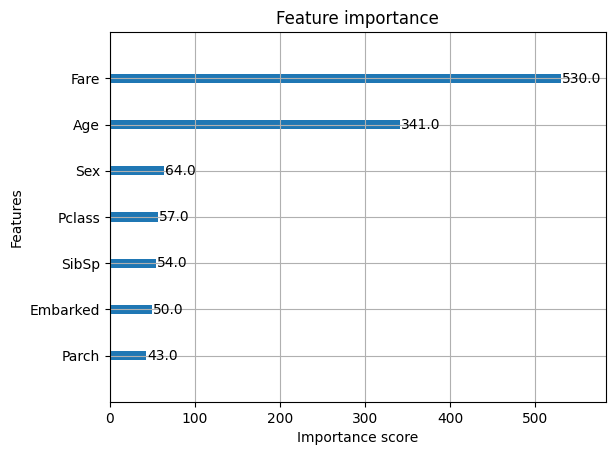

In [94]:
best_gb_model.named_steps['classifier'].get_booster().feature_names = gb_X.columns.tolist()

plot_importance(best_gb_model.named_steps['classifier'])
plt.show()

In [95]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best Accuracy (CV): 0.8371939736346516


In [96]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, ...))])

### Evaluate against known Survivors

In [97]:
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score),
    "roc_auc":make_scorer(roc_auc_score)
}

cv_results = cross_validate(best_gb_model, gb_X, gb_y, cv=StratifiedKFold(5), scoring=scoring)
cv_results

{'fit_time': array([0.06142187, 0.05303121, 0.06384778, 0.05995965, 0.05397105]),
 'score_time': array([0.02094746, 0.01417422, 0.01460266, 0.01498628, 0.01390219]),
 'test_accuracy': array([0.80446927, 0.82022472, 0.87078652, 0.81460674, 0.84831461]),
 'test_f1': array([0.73282443, 0.75384615, 0.816     , 0.73170732, 0.80291971]),
 'test_roc_auc': array([0.78418972, 0.80120321, 0.84772727, 0.78542781, 0.8389177 ])}

In [98]:
{key:np.mean(value) for key,value in cv_results.items()}

{'fit_time': np.float64(0.058446311950683595),
 'score_time': np.float64(0.01572256088256836),
 'test_accuracy': np.float64(0.8316803716025358),
 'test_f1': np.float64(0.7674595212858876),
 'test_roc_auc': np.float64(0.8114931418409913)}

In [99]:
gb_y_pred = best_gb_model.predict(X_test)

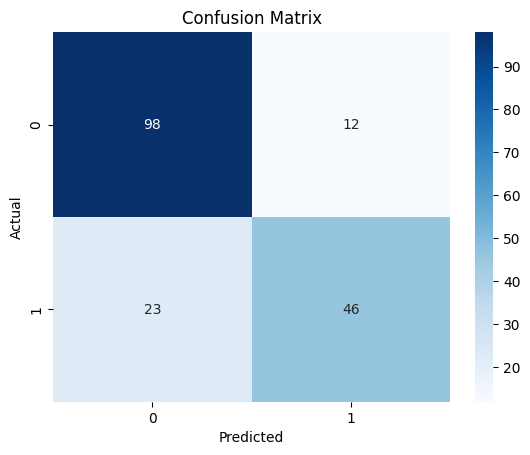

In [100]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, gb_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Generate Predictions

In [101]:
gb_test_df = test_df.copy()
gb_test_df = gb_test_df.drop(columns=["PassengerId", "Name", "Actual_Name", "Ticket", "Cabin", "Deck", "DeckLevel", "RoomNo"])

In [102]:
gb_test_pred = best_gb_model.predict(gb_test_df)

In [103]:
gb_results_df = test_df[['PassengerId']].copy()
gb_results_df['Survived'] = gb_test_pred

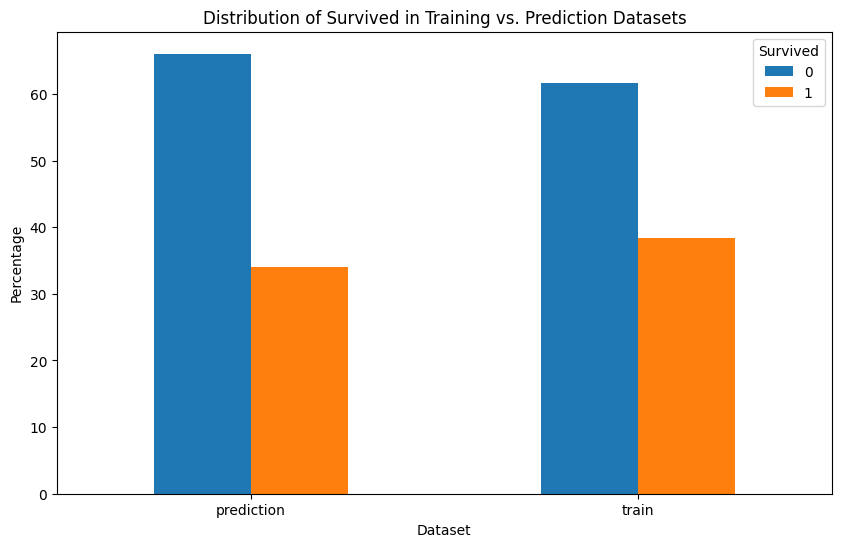

In [104]:
# prompt: Using dataframe lr_predictions: make plots that compare distribution of the prediction dataset to the training dataset, using percentages of the whole

# Combine the prediction data with the training data for comparison
combined_data = pd.concat([pd.DataFrame(gb_y)['Survived'],
                           gb_results_df['Survived']], keys=['train', 'prediction']).reset_index()
combined_data.columns = ['dataset', 'index', 'Survived']

# Calculate the value counts and normalize them to percentages
distribution = combined_data.groupby('dataset')['Survived'].value_counts(normalize=True).unstack() * 100

# Create a bar plot
distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Survived in Training vs. Prediction Datasets')
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', loc='upper right')
plt.show()

In [105]:
distribution

Survived,0,1
dataset,,
prediction,66.028708,33.971292
train,61.616162,38.383838


In [106]:
# Export test predictions to CSV
gb_results_df.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 5: Titanic Machine Learning through Disaster/predictions_gradientboostedtrees.csv", index=False)

## Model 3: Extra Trees

In [107]:
et_train_df = train_df.copy()
et_train_df = et_train_df.drop(columns=["PassengerId", "Name", "Actual_Name", "Ticket", "Cabin", "Deck", "DeckLevel", "RoomNo"])
# PassengerID                     An index, no predictive power
# Name, Actual Name               Typically unique, no predictive power
# Ticket                          High cardinality, negligible predictive power
# Cabin, Deck, DeckLevel, RoomNo  Low fill rate, would need to rely on heavy impution, risking model integrity

In [108]:
et_X = et_train_df.drop("Survived", axis=1)
et_y = et_train_df["Survived"]

In [109]:
et_X_train, et_X_test, et_y_train, et_y_test = train_test_split(
    et_X, et_y, test_size=0.2, stratify=et_y, random_state=42
)

In [110]:
et_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("classifier", ExtraTreesClassifier(random_state=42))
])

In [111]:
et_param_grid = {
    "classifier__n_estimators": [150, 155, 160, 165, 170],
    "classifier__max_features": ['sqrt', 'log2'],
    "classifier__max_depth": [6, 7, 8, 9, 10],
    "classifier__criterion": ['gini', 'entropy']
}

In [112]:
et_cross_validation = 12
et_grid_search = GridSearchCV(
    et_pipeline,
    param_grid=et_param_grid,
    scoring="accuracy",
    cv=et_cross_validation,
    verbose=1,
    n_jobs=-1
)

In [113]:
@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_callback
        tqdm_object.close()


In [114]:
total_fits = et_cross_validation * len(et_param_grid['classifier__n_estimators']) * len(et_param_grid['classifier__max_features']) * len(et_param_grid['classifier__max_depth']) * len(et_param_grid['classifier__criterion'])
print(f"{total_fits} fits to be tested")

1200 fits to be tested


In [115]:
# with tqdm_joblib(tqdm(desc="Fitting ExtraTrees GridSearch", total=total_fits)) as progress_bar:
#     et_grid_search.fit(et_X_train, et_y_train)
et_grid_search.fit(et_X_train, et_y_train)

Fitting 12 folds for each of 100 candidates, totalling 1200 fits


GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        ExtraTreesClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [6, 7, 8, 9, 10],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [150, 155, 160, 165, 170]},
             scoring='accuracy', verbose=1)

In [116]:
print("Best Parameters:", et_grid_search.best_params_)
print("Best Accuracy (CV):", et_grid_search.best_score_)

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 160}
Best Accuracy (CV): 0.830131826741996


In [117]:
et_imputer = et_grid_search.best_estimator_.named_steps['imputer']
et_scaler = et_grid_search.best_estimator_.named_steps['scaler']
et_classifier = et_grid_search.best_estimator_.named_steps['classifier']

In [118]:
et_feature_names = et_X_train.columns

In [119]:
et_importances = et_classifier.feature_importances_

In [120]:
et_feature_importances = pd.Series(et_importances, index=et_feature_names).sort_values(ascending=False)
et_feature_importances

,0
Sex,0.473242
Pclass,0.181963
Fare,0.102881
Age,0.090965
Parch,0.054799
SibSp,0.053014
Embarked,0.043136


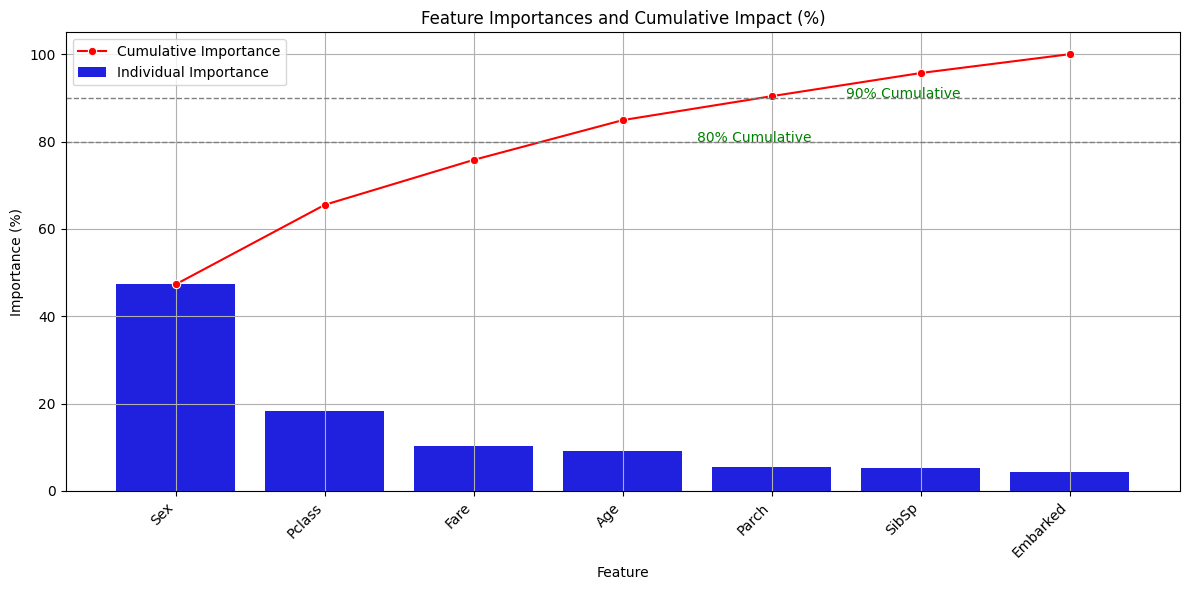

In [121]:
et_feat_df = et_feature_importances.reset_index()
et_feat_df.columns = ['feature', 'importance']

# Convert to percentage
et_feat_df['importance_pct'] = 100 * et_feat_df['importance']
et_feat_df['cumulative_pct'] = et_feat_df['importance_pct'].cumsum()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance_pct', data=et_feat_df, color='blue', label='Individual Importance')

# Add cumulative line
sns.lineplot(x='feature', y='cumulative_pct', data=et_feat_df, color='red', marker='o', label='Cumulative Importance')

# Styling
plt.axhline(80, color='gray', linestyle='--', linewidth=1)
plt.text(3.5, 80, '80% Cumulative', color='green')

plt.axhline(90, color='gray', linestyle='--', linewidth=1)
plt.text(4.5, 90, '90% Cumulative', color='green')

plt.title("Feature Importances and Cumulative Impact (%)")
plt.ylabel("Importance (%)")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [122]:
et_grid_search.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 ExtraTreesClassifier(criterion='entropy', max_depth=8,
                                      n_estimators=160, random_state=42))])

In [123]:
et_X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [124]:
et_best_model = et_grid_search.best_estimator_

### Evaluate against known Survivors

In [125]:
et_y_pred = et_best_model.predict(et_X_test)

In [126]:
print("Best Parameters:", et_grid_search.best_params_)
print("Accuracy Score:", accuracy_score(et_y_test, et_y_pred))
print("\nClassification Report:\n", classification_report(et_y_test, et_y_pred))

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 160}
Accuracy Score: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       110
           1       0.84      0.61      0.71        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



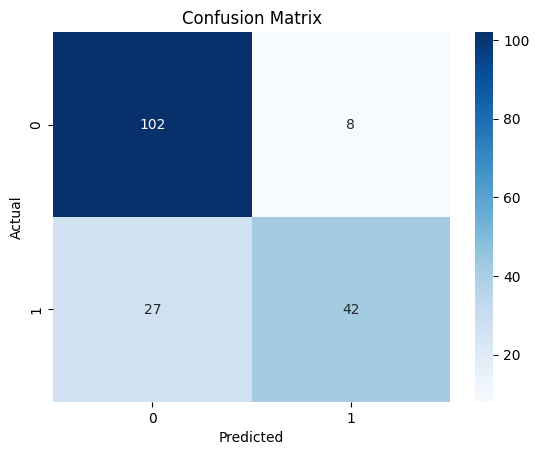

In [127]:
# Confusion matrix
sns.heatmap(confusion_matrix(et_y_test, et_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Generate Predictions

In [128]:
et_test_df = test_df.copy()
et_test_df = et_test_df.drop(columns=["PassengerId", "Name", "Actual_Name", "Ticket", "Cabin", "Deck", "DeckLevel", "RoomNo"])

In [129]:
et_test_pred = et_best_model.predict(et_test_df)

In [130]:
et_results_df = test_df[['PassengerId']].copy()
et_results_df['Survived'] = et_test_pred

In [131]:
# Export test predictions to CSV
et_results_df.to_csv("/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 5: Titanic Machine Learning through Disaster/predictions_extratrees.csv", index=False)